<a href="https://colab.research.google.com/github/akhil1297/akhil1297/blob/main/ALY6110_BHReport_AkhilAchanta.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

-----Boston Housing dataset Module 3 - Individual Lab-----

In [2]:
import pandas as pd
import numpy as np
#Q1 Loading and indexing the dataset
boston= pd.read_csv('BostonHousing.csv')
print(boston.head())

      crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        b  lstat  medv  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2  


In [4]:
#Checking for missing values and dropping if there are any.
print(boston.isnull().sum())
boston = boston.dropna()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64


In [5]:
#Q2 Checking the top 5 values
boston.head()


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [6]:
pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.0/317.0 MB 4.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.1-py2.py3-none-any.whl size=317488491 sha256=27af9e1ac7a14f165f51a3fc6ad44a83e8cd56d337373c3c9a802ecef81a8fcf
  Stored in directory: /root/.cache/pip/wheels/80/1d/60/2c256ed38dddce2fdd93be545214a63e02fbd8d74fb0b7f3a6
Successfully built pyspark


In [7]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, mean
#Initialize Spark Session
spark = SparkSession.builder.appName("BostonHousing").getOrCreate()
#Loading the data
data = spark.read.csv("BostonHousing.csv", sep=",", header = True, inferSchema=True)

In [8]:
#Q3 Count the no. of. observations in the dataset
data.count()

506

In [9]:
#Q4 Printing the schema
data.printSchema()

root
 |-- crim: double (nullable = true)
 |-- zn: double (nullable = true)
 |-- indus: double (nullable = true)
 |-- chas: integer (nullable = true)
 |-- nox: double (nullable = true)
 |-- rm: double (nullable = true)
 |-- age: double (nullable = true)
 |-- dis: double (nullable = true)
 |-- rad: integer (nullable = true)
 |-- tax: integer (nullable = true)
 |-- ptratio: double (nullable = true)
 |-- b: double (nullable = true)
 |-- lstat: double (nullable = true)
 |-- medv: double (nullable = true)



In [10]:
#Q5 Dropping column 'b' of the dataset
data = data.drop('b')
data.show()

+-------+----+-----+----+-----+-----+-----+------+---+---+-------+-----+----+
|   crim|  zn|indus|chas|  nox|   rm|  age|   dis|rad|tax|ptratio|lstat|medv|
+-------+----+-----+----+-----+-----+-----+------+---+---+-------+-----+----+
|0.00632|18.0| 2.31|   0|0.538|6.575| 65.2|  4.09|  1|296|   15.3| 4.98|24.0|
|0.02731| 0.0| 7.07|   0|0.469|6.421| 78.9|4.9671|  2|242|   17.8| 9.14|21.6|
|0.02729| 0.0| 7.07|   0|0.469|7.185| 61.1|4.9671|  2|242|   17.8| 4.03|34.7|
|0.03237| 0.0| 2.18|   0|0.458|6.998| 45.8|6.0622|  3|222|   18.7| 2.94|33.4|
|0.06905| 0.0| 2.18|   0|0.458|7.147| 54.2|6.0622|  3|222|   18.7| 5.33|36.2|
|0.02985| 0.0| 2.18|   0|0.458| 6.43| 58.7|6.0622|  3|222|   18.7| 5.21|28.7|
|0.08829|12.5| 7.87|   0|0.524|6.012| 66.6|5.5605|  5|311|   15.2|12.43|22.9|
|0.14455|12.5| 7.87|   0|0.524|6.172| 96.1|5.9505|  5|311|   15.2|19.15|27.1|
|0.21124|12.5| 7.87|   0|0.524|5.631|100.0|6.0821|  5|311|   15.2|29.93|16.5|
|0.17004|12.5| 7.87|   0|0.524|6.004| 85.9|6.5921|  5|311|   15.

In [11]:
#Q6 Round all of the numerical columns into two decimal place
data = data.select([col(c).cast("float").alias(c) for c in data.columns])
data.show()

+-------+----+-----+----+-----+-----+-----+------+---+-----+-------+-----+----+
|   crim|  zn|indus|chas|  nox|   rm|  age|   dis|rad|  tax|ptratio|lstat|medv|
+-------+----+-----+----+-----+-----+-----+------+---+-----+-------+-----+----+
|0.00632|18.0| 2.31| 0.0|0.538|6.575| 65.2|  4.09|1.0|296.0|   15.3| 4.98|24.0|
|0.02731| 0.0| 7.07| 0.0|0.469|6.421| 78.9|4.9671|2.0|242.0|   17.8| 9.14|21.6|
|0.02729| 0.0| 7.07| 0.0|0.469|7.185| 61.1|4.9671|2.0|242.0|   17.8| 4.03|34.7|
|0.03237| 0.0| 2.18| 0.0|0.458|6.998| 45.8|6.0622|3.0|222.0|   18.7| 2.94|33.4|
|0.06905| 0.0| 2.18| 0.0|0.458|7.147| 54.2|6.0622|3.0|222.0|   18.7| 5.33|36.2|
|0.02985| 0.0| 2.18| 0.0|0.458| 6.43| 58.7|6.0622|3.0|222.0|   18.7| 5.21|28.7|
|0.08829|12.5| 7.87| 0.0|0.524|6.012| 66.6|5.5605|5.0|311.0|   15.2|12.43|22.9|
|0.14455|12.5| 7.87| 0.0|0.524|6.172| 96.1|5.9505|5.0|311.0|   15.2|19.15|27.1|
|0.21124|12.5| 7.87| 0.0|0.524|5.631|100.0|6.0821|5.0|311.0|   15.2|29.93|16.5|
|0.17004|12.5| 7.87| 0.0|0.524|6.004| 85

In [12]:
#Q7 Create a new column (Age10)  with 10% increasing of 'age' column
data = data.withColumn('Age10', col('age') * 1.1)
data.show()

+-------+----+-----+----+-----+-----+-----+------+---+-----+-------+-----+----+------------------+
|   crim|  zn|indus|chas|  nox|   rm|  age|   dis|rad|  tax|ptratio|lstat|medv|             Age10|
+-------+----+-----+----+-----+-----+-----+------+---+-----+-------+-----+----+------------------+
|0.00632|18.0| 2.31| 0.0|0.538|6.575| 65.2|  4.09|1.0|296.0|   15.3| 4.98|24.0| 71.71999664306641|
|0.02731| 0.0| 7.07| 0.0|0.469|6.421| 78.9|4.9671|2.0|242.0|   17.8| 9.14|21.6| 86.79000167846681|
|0.02729| 0.0| 7.07| 0.0|0.469|7.185| 61.1|4.9671|2.0|242.0|   17.8| 4.03|34.7|  67.2099983215332|
|0.03237| 0.0| 2.18| 0.0|0.458|6.998| 45.8|6.0622|3.0|222.0|   18.7| 2.94|33.4| 50.37999916076661|
|0.06905| 0.0| 2.18| 0.0|0.458|7.147| 54.2|6.0622|3.0|222.0|   18.7| 5.33|36.2|59.620000839233406|
|0.02985| 0.0| 2.18| 0.0|0.458| 6.43| 58.7|6.0622|3.0|222.0|   18.7| 5.21|28.7|  64.5700008392334|
|0.08829|12.5| 7.87| 0.0|0.524|6.012| 66.6|5.5605|5.0|311.0|   15.2|12.43|22.9|  73.2599983215332|
|0.14455|1

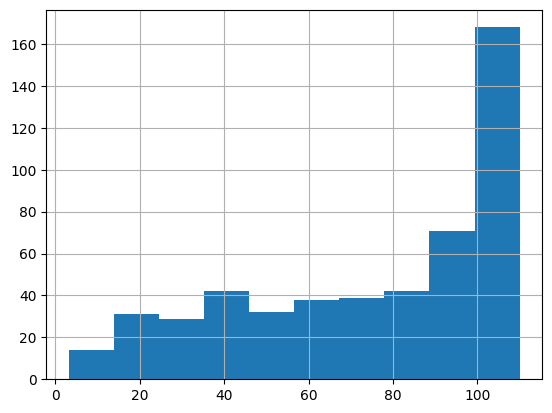

In [13]:
#Q8 Plot histogram Age10 column on a 2D Plot
import matplotlib.pyplot as plt
data.toPandas()['Age10'].hist()
plt.show()

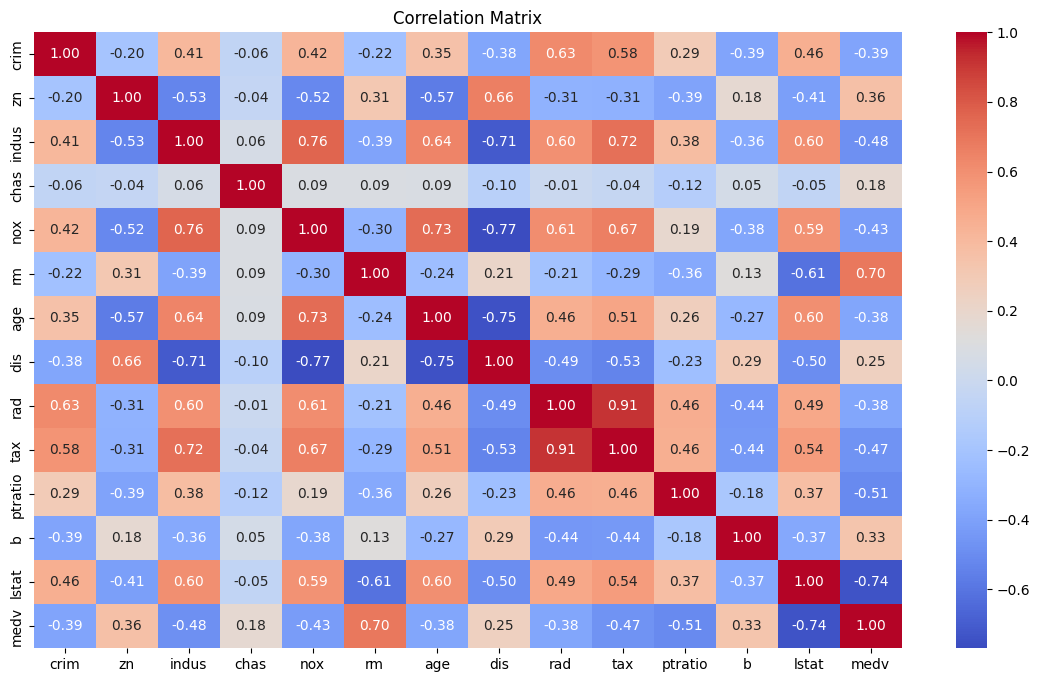

In [15]:
import seaborn as sns
#EDA: Correlation matrix
plt.figure(figsize=(14, 8))
sns.heatmap(boston.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

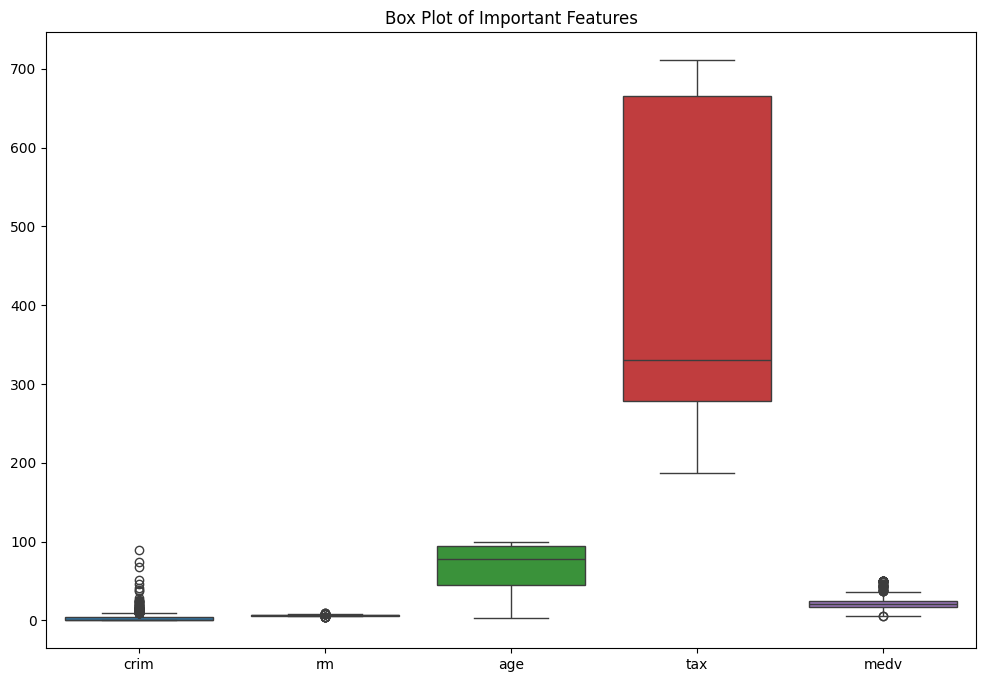

In [16]:
#Box plots to identify outliers
plt.figure(figsize=(12, 8))
sns.boxplot(data=boston[['crim', 'rm', 'age', 'tax', 'medv']])
plt.title('Box Plot of Important Features')
plt.show()

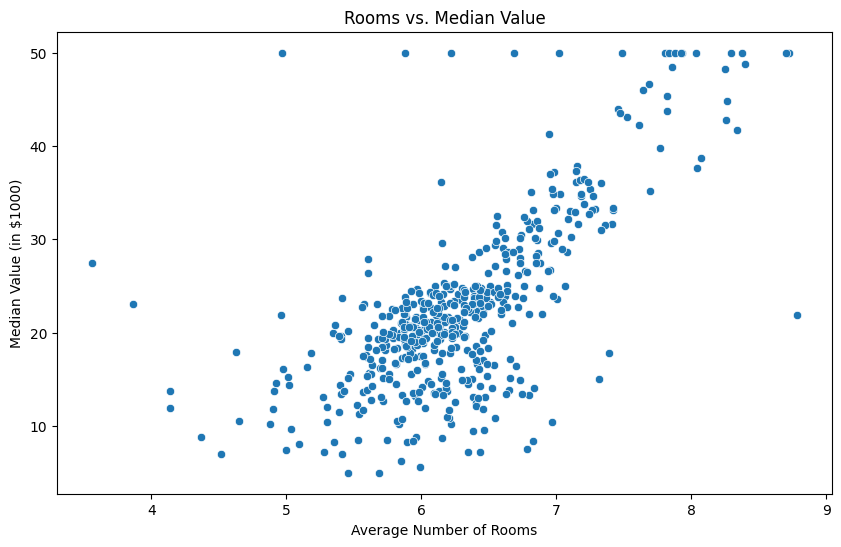

In [17]:
#Scatter plot of 'rm' (average number of rooms per dwelling) vs 'medv'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='rm', y='medv', data=boston)
plt.title('Rooms vs. Median Value')
plt.xlabel('Average Number of Rooms')
plt.ylabel('Median Value (in $1000)')
plt.show()

In [ ]:
#Provide Summary Statistics of all columns (count, mean, stddev,min, max)
data.describe().show()

+-------+------------------+------------------+------------------+------------------+-------------------+------------------+-----------------+------------------+-----------------+------------------+------------------+-----------------+------------------+------------------+
|summary|              crim|                zn|             indus|              chas|                nox|                rm|              age|               dis|              rad|               tax|           ptratio|            lstat|              medv|             Age10|
+-------+------------------+------------------+------------------+------------------+-------------------+------------------+-----------------+------------------+-----------------+------------------+------------------+-----------------+------------------+------------------+
|  count|               506|               506|               506|               506|                506|               506|              506|               506|              506

In [ ]:
#Convert  Spark Dataframe to Pandas Dataframe
statistics = data.describe().toPandas()
statistics

,summary,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv,Age10
0,count,506,506,506,506,506,506,506,506,506,506,506,506,506,506
1,mean,3.6135235607979284,11.363636363636363,11.136778750143975,0.0691699604743083,0.5546950601895336,6.2846343889538,68.57490120103708,3.7950426959708747,9.549407114624506,408.2371541501976,18.455533828659963,12.65306323389762,22.532806362559203,75.43239132114081
2,stddev,8.601545086608333,23.32245299451514,6.860352981600071,0.2539940413404101,0.11587767537000229,0.7026171549459193,28.14886153280278,2.1057101419201327,8.707259384239366,168.53711605495903,2.164945781031262,7.141061500114596,9.197104107890645,30.963747686083064
3,min,0.00632,0.0,0.46,0.0,0.385,3.561,2.9,1.1296,1.0,187.0,12.6,1.73,5.0,3.190000104904175
4,max,88.9762,100.0,27.74,1.0,0.871,8.78,100.0,12.1265,24.0,711.0,22.0,37.97,50.0,110.00000000000001


In [ ]:
#Show the last 5 rows of Pandas DataFrame
statistics.tail()

,summary,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv,Age10
0,count,506,506,506,506,506,506,506,506,506,506,506,506,506,506
1,mean,3.6135235607979284,11.363636363636363,11.136778750143975,0.0691699604743083,0.5546950601895336,6.2846343889538,68.57490120103708,3.7950426959708747,9.549407114624506,408.2371541501976,18.455533828659963,12.65306323389762,22.532806362559203,75.43239132114081
2,stddev,8.601545086608333,23.32245299451514,6.860352981600071,0.2539940413404101,0.11587767537000229,0.7026171549459193,28.14886153280278,2.1057101419201327,8.707259384239366,168.53711605495903,2.164945781031262,7.141061500114596,9.197104107890645,30.963747686083064
3,min,0.00632,0.0,0.46,0.0,0.385,3.561,2.9,1.1296,1.0,187.0,12.6,1.73,5.0,3.190000104904175
4,max,88.9762,100.0,27.74,1.0,0.871,8.78,100.0,12.1265,24.0,711.0,22.0,37.97,50.0,110.00000000000001


In [ ]:
#Stop Spark Session
spark.stop()